In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [3]:
# Upload from local device
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)  # For Excel: pd.read_excel(file_name)

Saving cleaned_driver_physiology.csv to cleaned_driver_physiology.csv


In [6]:
print(f"Shape: {df.shape} rows, columns")

Shape: (1224, 4) rows, columns


In [7]:
display(df.head())

print("\n Dataset Info:")
df.info()

print("\n Basic Statistics:")
display(df.describe(include='all'))

,Body_Temperature,Heart_Rate,SPO2,Driver_State
0,95.50,54,85,5
1,95.90,54,85,5
2,96.10,54,85,5
3,100.22,54,99,5
4,100.10,54,79,7



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Body_Temperature  1224 non-null   float64
 1   Heart_Rate        1224 non-null   int64  
 2   SPO2              1224 non-null   int64  
 3   Driver_State      1224 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 38.4 KB

 Basic Statistics:


,Body_Temperature,Heart_Rate,SPO2,Driver_State
count,1224.000000,1224.000000,1224.000000,1224.000000
mean,99.424338,74.310458,80.053105,6.977124
std,2.600079,9.650644,11.876702,2.181345
min,95.000000,54.000000,60.000000,0.000000
25%,97.160000,67.000000,70.000000,6.000000
50%,99.320000,74.000000,80.000000,7.000000
75%,101.660000,81.000000,90.000000,9.000000
max,104.000000,102.000000,100.000000,9.000000


In [8]:
# Missing Values Analysis (with visualization)
print("\n Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))


 Missing Values:
Series([], dtype: int64)


In [13]:
# Univariate Analysis (Single Variables)
print("\n Distribution of Numeric Features:")
numeric_cols = df.select_dtypes(include=np.number).columns


 Distribution of Numeric Features:


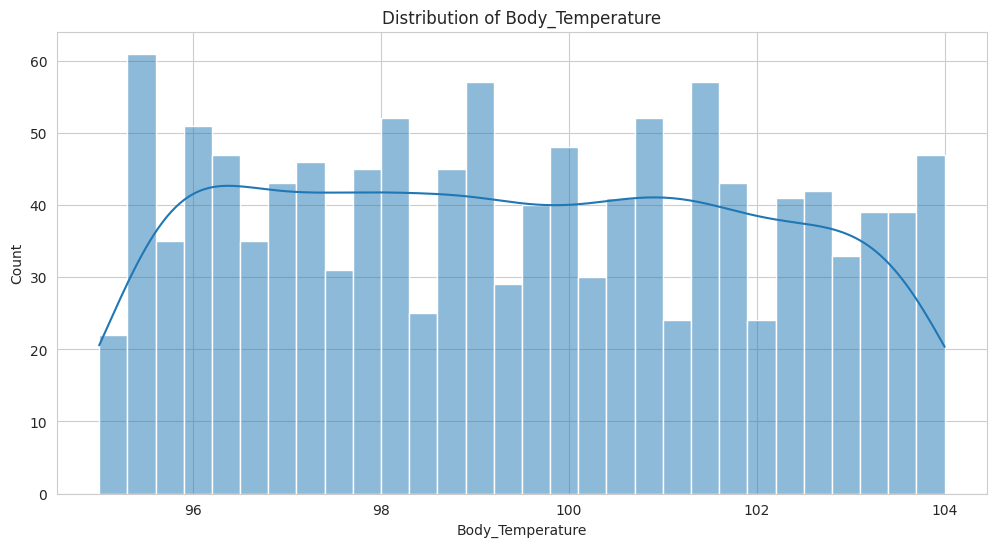

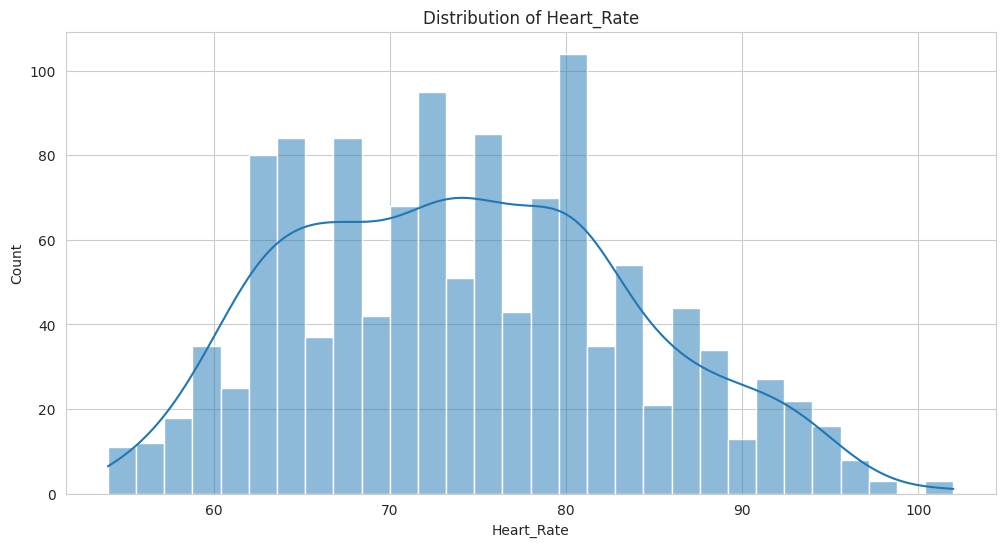

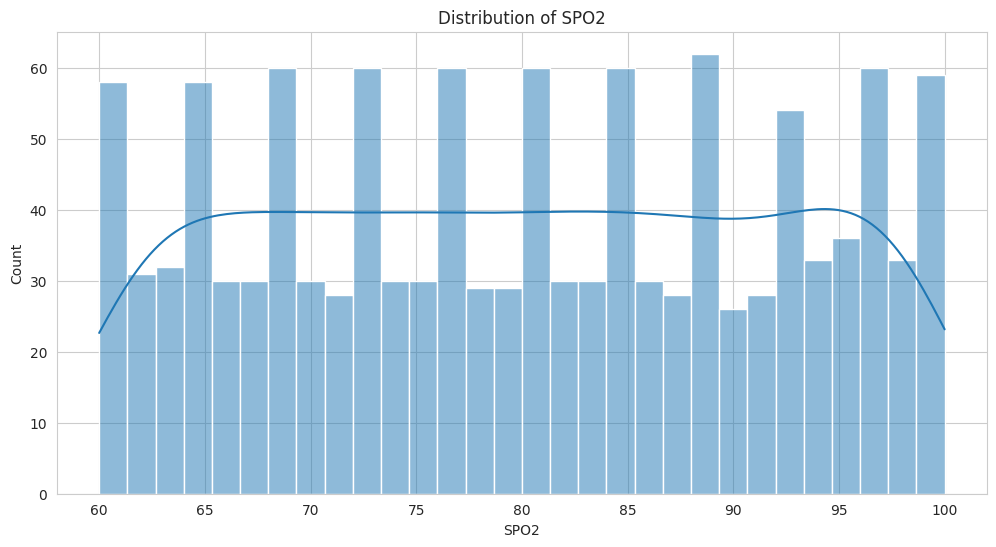

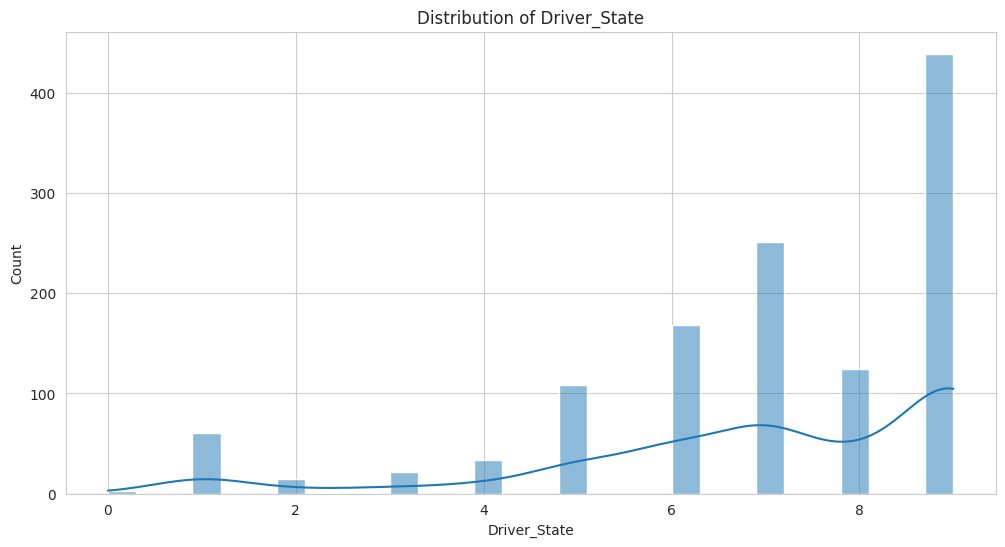


 Count of Categorical Values:


In [15]:
# Plot histograms for all numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
print("\n Count of Categorical Values:")
categorical_cols = df.select_dtypes(include='object').columns



In [19]:
# Plot value counts for top categories
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')  # Top 10 only
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


 Relationships Between Numeric Features:


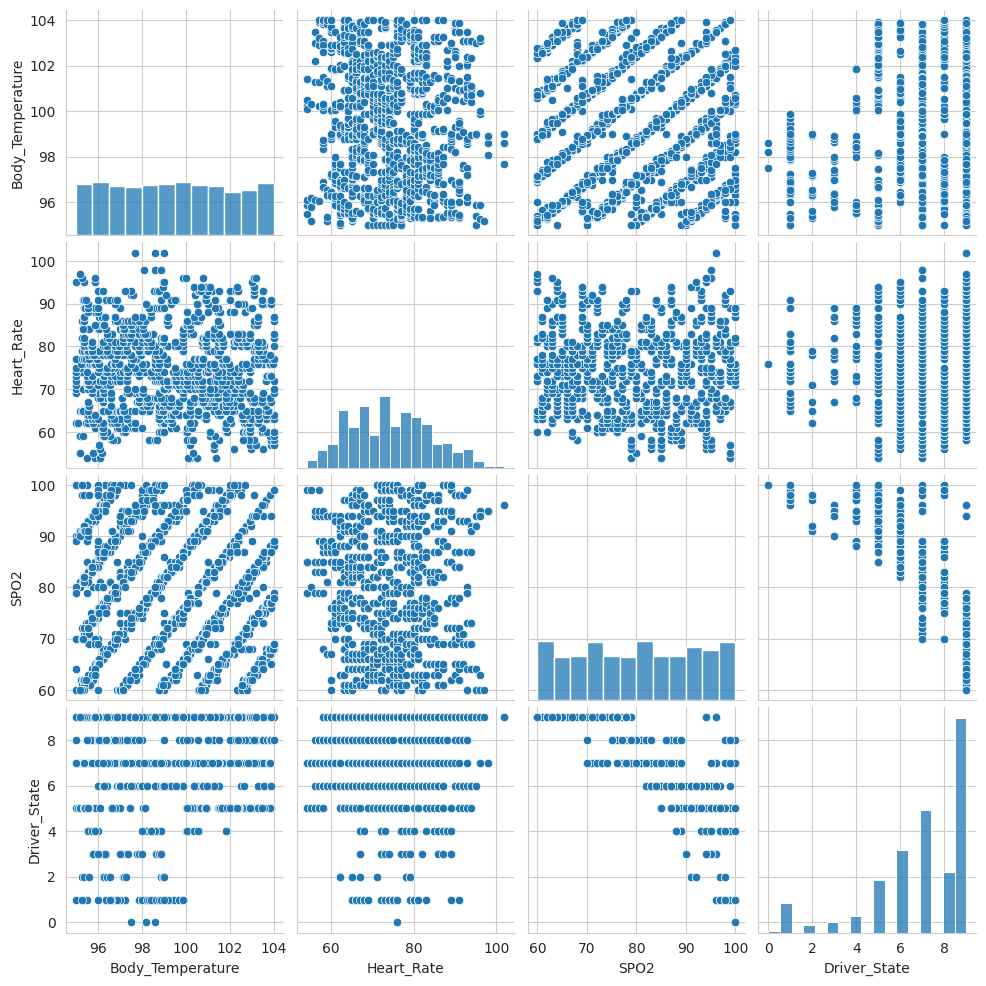

In [21]:
#  Relationships Analysis (Bivariate)
print("\n Relationships Between Numeric Features:")
# Pairplot for small datasets (<10 numeric columns)
if len(numeric_cols) <= 10:
    sns.pairplot(df[numeric_cols])
    plt.show()
else:
    print("Too many numeric columns for pairplot - try correlation heatmap instead")

    # Correlation heatmap
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap")
    plt.show()


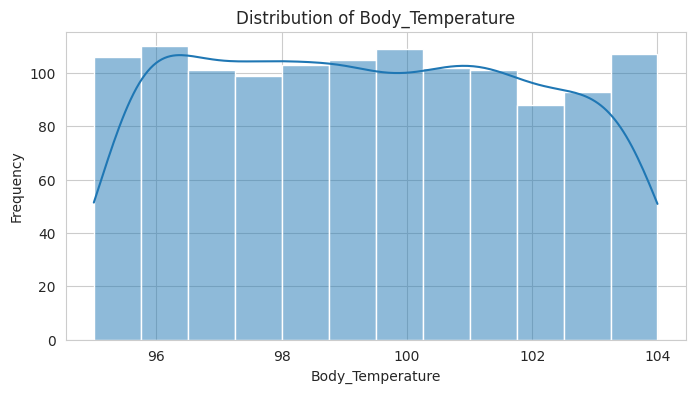

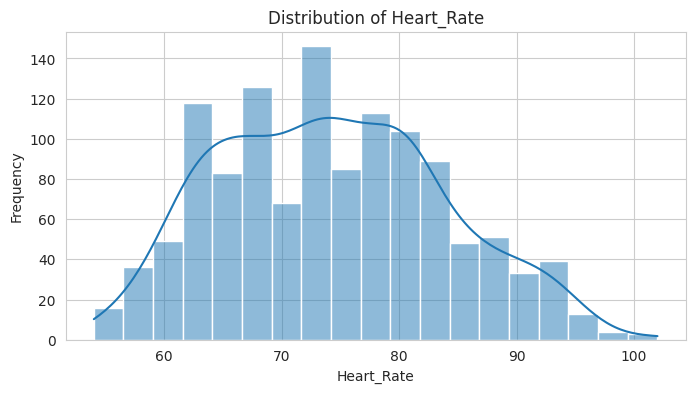

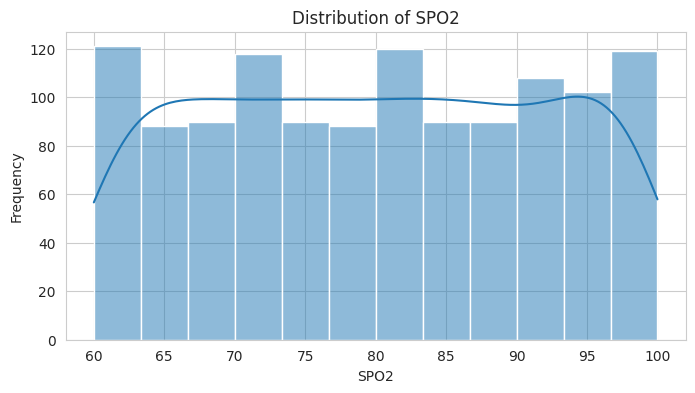

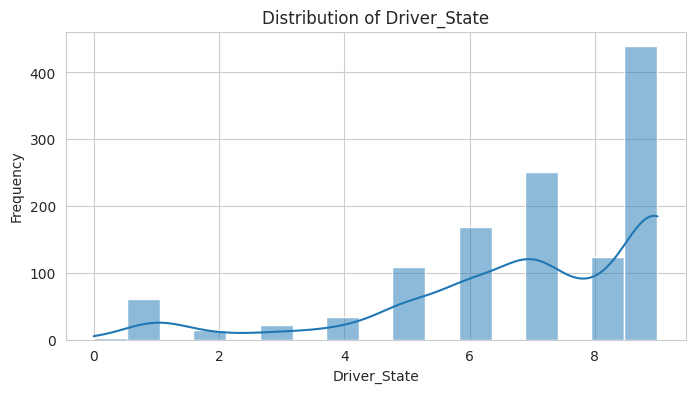

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()